In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [73]:
liver_df = pd.read_csv("indian_liver_patient.csv")
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [74]:
# # Checking if there is some null values or not
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Text(0.5,0.98,'Disease by Gender and Age')

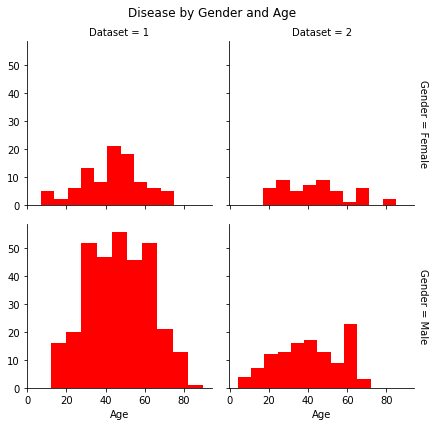

In [75]:
# Plotting Age vs Gender
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


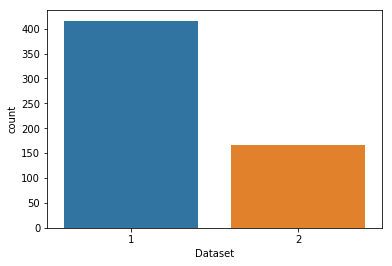

In [76]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

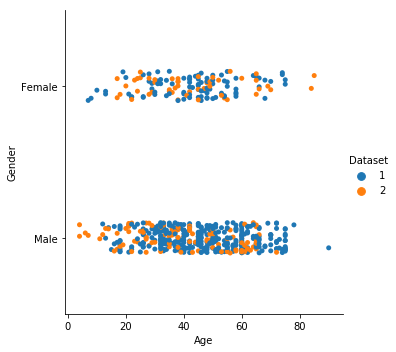

In [77]:
# Plotting patient Age vs Gender
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df)

In [78]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [79]:
# Concatination
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [80]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [81]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [83]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

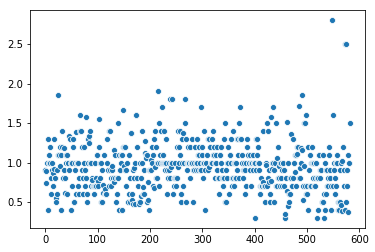

In [84]:
sns.scatterplot(data=liver_df.Albumin_and_Globulin_Ratio)

In [85]:
# In the Dataset 1 implies the patient have liver disease; 2 implies the patients do not have liver disease
X = liver_df.drop(['Gender','Dataset'], axis=1)
X.head(3)
y = liver_df['Dataset']

In [86]:
liver_corr = X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


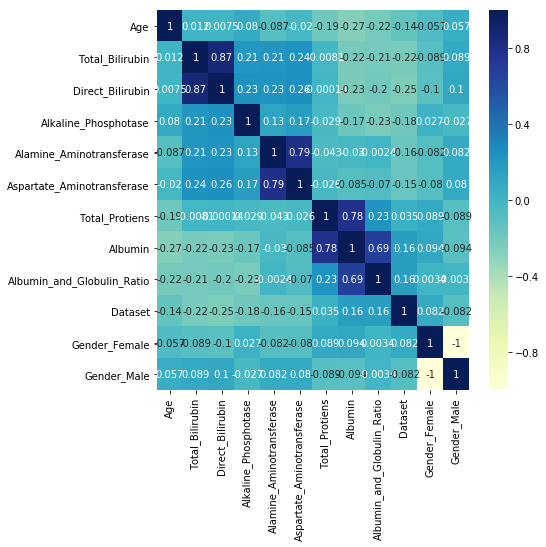

In [93]:
#plot the correlation
plt.figure(figsize=(7,7))
sns.heatmap(liver_df.corr(),annot=True,cmap="YlGnBu")

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(390, 9)
(390,)
(193, 9)
(193,)


In [34]:
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

# Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

Logistic Regression Training Score: 
 71.03
Logistic Regression Test Score: 
 73.58
Accuracy: 
 0.7357512953367875
Confusion Matrix: 
 [[133   8]
 [ 43   9]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.76      0.94      0.84       141
           2       0.53      0.17      0.26        52

    accuracy                           0.74       193
   macro avg       0.64      0.56      0.55       193
weighted avg       0.69      0.74      0.68       193

